# Instruções gerais

Para executar uma CÉLULA, pressione o botão "Run" no topo, com a CÉLULA selecionada, ou pressione:
    
    Shift + Enter

EXECUTE APENAS UMA CÉLULA POR VEZ

-Caso deseje apagar a saída de uma célula carregada, mas não deseje carregar uma nova saída, vá à aba superior, escolha o ícone
do teclado (open the command palette/ jupyter-notebook command group) e selecione clear cell output.

@author: Marco César Prado Soares, MSc.
Especialista Lean Six Sigma Master Black Belt, Eng. Químico, MSc. Eng. Mecatrônica (instrumentação) 
Marco.Soares@br.ey.com; marcosoares.feq@gmail.com

# **Caracterização Inicial do Dataframe e Data Cleaning**

## **Carregar bibliotecas necessárias à análise**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importar dataframe no Anaconda, Azure Data Studio, ou Google Colab**

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Tanto em Python quanto em R, um dataframe é um <b>objeto criado</b> que <b>armazena uma tabela de dados</b>.</span>

<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif">- O objeto é criado automaticamente quando importamos um arquivo txt, csv, ou xlsx para o ambiente de programação, ou quando o criamos a partir de um dicionário, por exemplo (dicionário é um objeto que pode armazenar outros objetos de diversos tipos, desde variáveis numéricas até dataframes ou listas).</span>

<span style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;mso-ansi-language:
PT-BR;mso-fareast-language:EN-US;mso-bidi-language:AR-SA">- Para importar o dataframe, utilizamos comandos do Pandas que variam para arquivo do Excel, csv com cabeçalho, ou csv sem cabeçalho. <b><span style="color:red">Arquivos .txt e .csv são lidos da mesma forma</span></b>.</span>

**Dados em arquivo xlsx**

In [ ]:
## dados em arquivo xlsx

caminho = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 2 - ANN regression\ANN.1 - Apartment price analysis\prices_apartments.xlsx"
dataset = pd.read_excel(caminho)

**Dados em arquivo CSV (comma separated values) com cabeçalho**

In [ ]:
## dados em arquivo CSV (comma separated values) com cabeçalho

caminho = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 3 - ANN classification\ANN.Class - 2 - advertising campaign\delivery_app_data.csv"
dataset = pd.read_csv(caminho)

**Dados em arquivo CSV (comma separated values) sem cabeçalho**

In [ ]:
## dados em arquivo CSV (comma separated values) sem cabeçalho

caminho = "D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 2 - ANN regression\ANN.4 - Boston housing price\housing_boston_data.txt"
dataset = pd.read_csv(caminho, delim_whitespace=True, header=None)

#here, the dataset is in a textfile. In these cases, use delim_withespace = True
#or df = pd.read_fwf('output_list.txt')
#since data has no Head, keep header = None
#if there is Head, eliminate ‘header’ from the arguments of the function

## **Upload de dados utilizando Google Colab**

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Se estivéssemos utilizando o ambiente em nuvem do <b><span style="color:red">Google Colab</span></b> (Google Colaboratory, <span class="MsoHyperlink"><a href="https://research.google.com/colaboratory/">https://research.google.com/colaboratory/</a></span>), precisaríamos fazer o upload da tabela no servidor do Google<b>. <span style="color:red;background:yellow;
mso-highlight:yellow">Para isso, alguns comandos extras seriam necessários</span></b>:</span>

In [ ]:
#Carregar arquivos para o servidor do Google Colab

from google.colab import files

uploaded = files.upload()

#o conjunto de arquivos está agora gravado no objeto chamado 'uploaded'

In [ ]:
#Verificar os arquivos carregados no servidor e salvos no objeto 'uploaded'

for fn in uploaded.keys():
    
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Ou, mais simplificadamente:</span>

 <span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <span style="background:yellow;mso-highlight:yellow">from google.colab import files</span><o:p></o:p></span>

 <span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <span style="background:yellow;mso-highlight:yellow">upload_file = files.upload()</span><o:p></o:p></span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Estes comandos geram uma caixa de seleção que permite navegar pelos arquivos do computador e selecionar o arquivo que será carregado ao servidor. O Google Colab permite a utilização do poder computacional dos servidores do Google, possibilitando o acesso amplo às bibliotecas deep learning (Keras e Tensorflow), as quais requerem requisitos computacionais muito superiores.</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- O procedimento para integrar arquivos do Google Drive é mais complexo, e se encontra em: <span class="MsoHyperlink"><a href="https://colab.research.google.com/notebooks/io.ipynb">https://colab.research.google.com/notebooks/io.ipynb</a></span>.</span>

## **Criação de janela de input de dados pelo usuário (utilizável para fazer o upload dos dados)**

<span style="color: black; font-family: &quot;Times New Roman&quot;, serif; font-size: 12pt;">- Para criar uma janela de input na qual o usuário insere um dado automaticamente atualizado pela planilha, use o comando a seguir. Este comando pode ser útil para o usuário inserir o Path (endereço) do arquivo csv a ser lido. É uma estratégia que facilita a navegação e aumenta a interação com o usuário.</span>  

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">- “Shortcut”: com a tecla </span> **<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;color:red">Shift pressionada</span>**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
color:black;mso-themecolor:text1">, clique com o </span> **<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
color:red">botão direito do mouse</span>** <span style="font-size:
12.0pt;font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">sobre o arquivo desejado e selecione a opção “<b>Copiar como caminho</b>” (“Copy as path”). Isto fará com que a área de transferência armazene o endereço do arquivo como uma string, <b>e entre aspas</b>.</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">- Caso esteja digitando o código, basta apagar o trecho com o caminho (e.g. </span> <span lang="EN-US" style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
background:yellow;mso-highlight:yellow;mso-ansi-language:EN-US">D:\Drive\FM2S\EAD\Green Belt em Python\Machine Learning - módulo 3 - ANN classification\ANN.Class - 1 - user sactisfaction\poll.csv"</span><span lang="EN-US" style="font-size:
12.0pt;font-family:&quot;Times New Roman&quot;,serif;mso-ansi-language:EN-US">) e pressionar Ctrl + V (ou clicar com o botão direito do mouse e pressionar Colar).</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Se estiver usando a janela de Input <b>e já houver definido o formato da variável como string (como no código seguinte), remova as aspas</b>. Caso contrário, o Python considerará que as aspas fazem parte do texto de input.</span>

In [ ]:
caminho = input("Digite aqui o caminho do arquivo SEM aspas.\nDica: segure a tecla Shift, clique com o botão direito do mouse sobre o arquivo e selecione a opção 'Copy as Path'. Depois, remova as aspas do endereço (path).")
#se for csv, mudar pd.read_excel para pd.read_csv na linha abaixo
dataset = pd.read_excel(caminho)

**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
color:red">Note que o texto entre aspas após o comando input representa as instruções que serão mostradas ao usuário junto à caixa de input.</span>**

<span style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;mso-ansi-language:
PT-BR;mso-fareast-language:EN-US;mso-bidi-language:AR-SA">O valor fornecido à janela será armazenado na variável à esquerda, no caso, “caminho”.</span>

## **Avaliar propriedades gerais do dataframe**

### **1\. <span style="font-size: 14px;">&nbsp;Podemos utilizar o comando .head() para&nbsp;</span> mostrar o cabeçalho:**

In [ ]:
dataset.head()

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Este comando mostra o cabeçalho e as 5 primeiras linhas (índices 0 a 4) do dataset.</span>

### **2\. Saber total de linhas do dataframe:**

In [ ]:
total = len(dataset)

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Este comando armazena em “total” a quantidade de linhas (tamanho) do dataframe df. O comando <b><span style="color:red">len (<span style="background:yellow;mso-highlight:
yellow">objeto</span>)</span></b> sempre calcula a dimensão (length) do <span style="background:yellow;mso-highlight:yellow">objeto</span>.<o:p></o:p></span>

### **3\. Saber formato do dataframe (total de linhas, total de colunas):**

In [ ]:
dataset.shape()

<span style="font-size:12.0pt;line-height:115%;
font-family:&quot;Times New Roman&quot;,serif;mso-fareast-font-family:Calibri;mso-fareast-theme-font:
minor-latin;mso-ansi-language:PT-BR;mso-fareast-language:EN-US;mso-bidi-language:
AR-SA">Este comando mostra as dimensões do dataframe df no formato (X, Y). Por exemplo, uma saída (1470, 35) representa um dataframe de 1470 linhas (entradas) por 35 colunas (variáveis/features).</span>

### **4. Saber os tipos de variáveis ou objetos do dataframe:**

In [ ]:
dataset.info()

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Este comando gerará uma lista com os <b>nomes de cada coluna, bem como a quantidade de entradas não-nulas daquela linha, e os tipos de variáveis ou objetos</b>.&nbsp;</span> 

<span style="font-family: &quot;Times New Roman&quot;, serif; font-size: 12pt;">Logicamente, o total de Missing Values (entradas nulas, representadas por </span> **<span style="color:red">None ou NaN em Python</span>**<span style="font-family: &quot;Times New Roman&quot;, serif; font-size: 12pt;">, </span> **NULL** <span style="font-family: &quot;Times New Roman&quot;, serif; font-size: 12pt;"> em R, isEmpty em VBA, ? em Knime, etc) será a </span> **diferença entre o total de linhas e o total de entradas não-nulas mostradas**<span style="font-family: &quot;Times New Roman&quot;, serif; font-size: 12pt;">. Um exemplo de saída é mostrado a seguir.</span>  

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">&lt;class 'pandas.core.frame.DataFrame'&gt;</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">RangeIndex: <span style="background:yellow;mso-highlight:yellow">1470 entries, 0 to 1469</span></span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">Data columns (<span style="background:yellow;mso-highlight:yellow">total 35 columns</span>):</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">Age&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="background:yellow;mso-highlight:yellow">1470 non-null</span> <span style="background:yellow;mso-highlight:yellow">int</span>64</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">Attrition&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;1470 non-null <span style="background:yellow;mso-highlight:yellow">object</span></span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">BusinessTravel&nbsp; &nbsp; &nbsp; 1470 non-null object</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">DailyRate&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;1470 non-null int64</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;; background: yellow;">dtypes: int64(26), object(9)</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">memory usage: 402.1+ KB</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Neste exemplo, são mostradas apenas as 4 primeiras colunas. Note que o cabeçalho informa que existem 1470 entradas, numeradas de 0 a 1469 e distribuídas em 35 colunas de dados. Vamos analisar as 2 primeiras linhas:</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">‘Age’: coluna contendo 1470 entradas não-nulas, armazenadas em variáveis do tipo inteiro (int64).&lt;o:p&gt;</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">‘Attrition’: coluna com 1470 entradas não-nulas, armazenadas em um objeto.</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Note que a última linha resume estes resultados: <b>dtypes mostra os diferentes tipos de colunas, e quantas colunas são de cada tipo</b>. Neste exemplo, temos 26 colunas do tipo int64 e 9 colunas do tipo objeto.</span>

### **5. Mostrar primeira linha do dataframe:**

In [ ]:
display(dataset.iloc[0])

<span style="font-size:12.0pt;line-height:115%;
font-family:&quot;Times New Roman&quot;,serif;mso-fareast-font-family:Calibri;mso-fareast-theme-font:
minor-latin;mso-ansi-language:PT-BR;mso-fareast-language:EN-US;mso-bidi-language:
AR-SA">Este comando mostra o valor assumido por cada variável (coluna) na <b>primeira linha</b> do dataset, possibilitando uma visualização dos valores e ordens de grandeza.</span>

### **6. Verificar se o dataframe apresenta entradas nulas:**

In [ ]:
dataset.isnull().any()

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Este comando mostrará cada uma das colunas do dataframe e um valor lógico (booleano): True caso haja entradas nulas (missing values) para aquela coluna; e False caso não haja entradas nulas. Tomando o mesmo exemplo acima (apenas 4 primeiras linhas), a saída é:</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">Age&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <span style="background:yellow;mso-highlight:yellow">False</span></span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">Attrition&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; False</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">BusinessTravel&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; False</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">DailyRate&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; False</span>

<span lang="EN-US" style="font-size: 9pt; font-family: &quot;Courier New&quot;;">dtype: <span style="background:yellow;mso-highlight:yellow">bool</span></span>

<span style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;mso-ansi-language:
PT-BR;mso-fareast-language:EN-US;mso-bidi-language:AR-SA">Note que a saída indica que nenhuma destas variáveis apresenta saída nula. O dtype mostra que todas as saídas do comando são booleanas (True ou False).</span>

### **7\. Verificar quais os valores únicos que podem ser assumidos por uma variável**

**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
background:yellow;mso-highlight:yellow">Podemos utilizar o comando unique</span>** **<span style="font-size:12.0pt;font-family:
&quot;Times New Roman&quot;,serif">do Pandas</span>**<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">:</span>

In [ ]:
dataset[‘Coluna A’].unique()
#substitua Coluna A pelo nome correto da coluna a ser analisada.

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Neste caso, serão mostrados os valores únicos da ‘Coluna A’ do dataframe df. Note que ambos os comandos são equivalentes ao <span style="color:red">SELECT DISTINCT </span>do SQL.</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Alternativamente, podemos utilizar a função <b><span style="color:red;
background:yellow;mso-highlight:yellow">numpy.unique(X).</span></b></span>

**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
color:red;background:yellow;mso-highlight:yellow">Podemos digitar esta função diretamente no console, o qual fornecerá uma lista contendo apenas os valores possíveis da lista X</span>**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif">. Assim, obtemos listas contendo <b>todos os valores possíveis</b> de uma determinada variável categórica.</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">Fazendo isso para a variável ‘Reason for the grade’, digitamos o seguinte comando no Console e apertamos Enter:<o:p></o:p></span>

<span lang="EN-US" style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;mso-ansi-language:
EN-US">np.unique(<span style="background:yellow;mso-highlight:yellow">dataset['Reason for the grade']</span>)<o:p></o:p></span>

 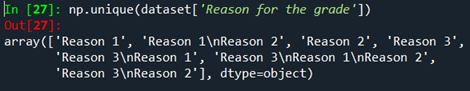

<span lang="EN-US" style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;mso-ansi-language:
EN-US">Vemos que esta variável pode assumir 7 valores diferentes, dados pelas strings: 'Reason 1'; 'Reason 1\nReason 2'; 'Reason 2'; 'Reason 3'; 'Reason 3\nReason 1'; 'Reason 3\nReason 1\nReason 2'; 'Reason 3\nReason 2'.<o:p></o:p></span>

## **<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif">8. Para as <span style="color:red">variáveis discretas (contáveis) ou classificatórias</span>, podemos contar quantas vezes cada resultado ocorre (equivalente ao SELECT DISTINCT COUNT do SQL).</span>**

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Suponha que a coluna ‘Results’ do dataframe df armazena resultados binários. Podemos criar uma lista y com os valores de ‘Results’ e fazer a contagem com o comando <b><span style="background:yellow;mso-highlight:yellow">value_counts()</span></b>.<o:p></o:p></span>

In [ ]:
y = df['Results']
#substitua Results pelo nome correto da coluna a ser analisada.

y.value_counts()

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">Um exemplo de saída é mostrado a seguir. Existem 1233 resultados 1, e 237 resultados zero (os valores possíveis daquela variável, que podem ser expressos como textos, são mostrados à esquerda).</span>

<span style="font-size: 9pt; font-family: &quot;Courier New&quot;;">1&nbsp;&nbsp;&nbsp; 1233</span>

<span style="font-size: 9pt; font-family: &quot;Courier New&quot;;">0&nbsp;&nbsp;&nbsp;&nbsp; 237</span>

<span style="font-size: 9pt; font-family: &quot;Courier New&quot;;">Name: <span style="background:yellow;mso-highlight:yellow">Results, dtype: int64</span></span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">A última linha informa o nome da variável (coluna) analisada, bem como o tipo de variável que ela armazena (int64).<o:p></o:p></span>

### **9\. Obter estatísticas gerais do dataset:**

In [ ]:
dataset.describe()

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">A saída desse comando será um dataframe contendo as seguintes estatísticas gerais: contagem de entradas (count); média (mean); desvio-padrão (std); menor valor assumido (min); limites do 1º (25%), 2º (50%), e 3º quartis (75%); e maior valor assumido (max).</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">Atenção: <b>só serão mostradas as variáveis numéricas</b>. Variáveis classificatórias expressas como texto ou data/timestamp serão omitidas.<o:p></o:p></span>

### <span style="font-size: 14px;"><b>10. Avaliação inicial da presença de correlações entre as variáveis (coeficiente de correlação = 1 representa correlação perfeita)</b></span>

<span style="font-size:12.0pt;line-height:115%;
font-family:&quot;Times New Roman&quot;,serif;mso-fareast-font-family:Calibri;mso-fareast-theme-font:
minor-latin;color:black;mso-themecolor:text1;mso-ansi-language:PT-BR;
mso-fareast-language:EN-US;mso-bidi-language:AR-SA"><b>-</b> Como se trata do R, não do R², valores vão de -1 a 1. Utilize o código seguinte para avaliar a presença de correlações e construir um mapa de calor (igual ao usado para as matrizes de confusão). Utilize o código abaixo para construir a matriz e obter uma saída como a mostrada abaixo.</span>

In [ ]:
dataset[col_numerical].corr()
#substitua col_numerical pelo nome correto da coluna a ser analisada.

plt.figure(figsize=(24,8))
sns.heatmap(df[col_numerical].corr(), annot=True, fmt=".2f");
#substitua col_numerical pelo nome correto da coluna a ser analisada.

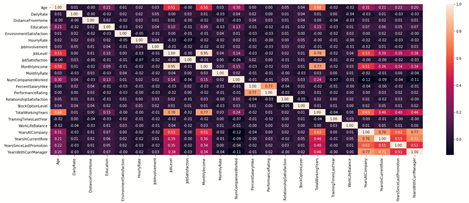

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">- Note que uma variável com ela mesma (diagonal principal) sempre resulta em correlação perfeita. Portanto, a diagonal principal deve ser ignorada. Para despoluir a visão, a biblioteca Seaborn (construída sobre a Matplotlib) nos permite aplicar uma máscara, que eliminará a porção indicada:<o:p></o:p></span>

In [ ]:
plt.figure(figsize=(24,8))
# Mask for the upper triangle
mask = np.zeros_like(df[col_numerical].corr(), dtype=np.bool)
#substitua col_numerical pelo nome correto da coluna a ser analisada.

mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap with mask and correct aspect ratio
sns.heatmap(df[col_numerical].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#substitua col_numerical pelo nome correto da coluna a ser analisada.

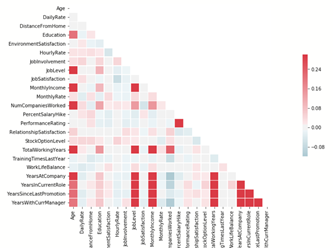

## **Remover elementos nulos do dataframe ou da série**

<span lang="EN-US" style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;color:black;
mso-themecolor:text1;mso-ansi-language:EN-US">pandas.Series.dropna(axis=0, inplace=False, how=None)<o:p></o:p></span>

<span lang="EN-US" style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
mso-ansi-language:EN-US"><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html#pandas.Series.dropna">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html#pandas.Series.dropna</a></span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">Você pode usar este comando para eliminar entradas da base de dados que possuem alguma das entradas nulas. </span> **<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;color:red">Isto é particularmente importante para a implementação de modelos de Machine Learning baseados em redes neurais</span>**<span style="font-size:12.0pt;font-family:
&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">: as redes neurais não serão implementadas se alguma das entradas não for numérica, e isso inclui tanto a presença de strings (textos e letras), quanto de entradas nulas.</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">A seguir, veja que você pode tanto eliminar a linha que contém ao menos uma entrada nula, quanto eliminar a linha se e somente se todas as suas entradas forem nulas.</span> 

**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
color:red;background:yellow;mso-highlight:yellow">Este comando consiste, portanto, numa poderosa ferramenta de limpeza dos dados (“data cleaning”) antes do processamento em Machine Learning, particularmente importante caso a base de dados seja muito extensa, dificultando encontrar as entradas problemáticas</span>**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;color:black;
mso-themecolor:text1">.<o:p></o:p></span>

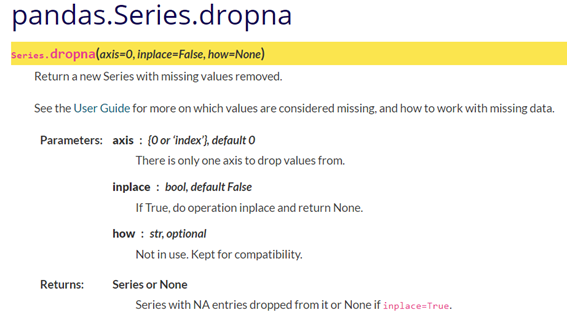

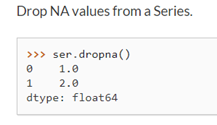

**<span lang="EN-US" style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;color:black;
mso-themecolor:text1;mso-ansi-language:EN-US;mso-fareast-language:EN-US;
mso-bidi-language:AR-SA">O dropna pode ser utilizado para remover</span>** **<span lang="EN-US" style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;color:red;
background:yellow;mso-highlight:yellow;mso-ansi-language:EN-US;mso-fareast-language:
EN-US;mso-bidi-language:AR-SA">todos os elementos nulos do dataframe</span>**<span lang="EN-US" style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;color:black;
mso-themecolor:text1;mso-ansi-language:EN-US;mso-fareast-language:EN-US;
mso-bidi-language:AR-SA">:</span>

In [ ]:
#It is important to clean the dataset before analyzing it, eliminating
#possible null entries - the Machine Learning model cannot work with such
#null values
dataset = dataset.dropna(axis=0)

## **Filtragem dos dados - como fazer o Encoding apenas com filtros**

**<span style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;color:black;
mso-themecolor:text1;mso-ansi-language:PT-BR;mso-fareast-language:EN-US;
mso-bidi-language:AR-SA">A estrutura básica da filtragem</span>** <span style="font-size:12.0pt;line-height:115%;font-family:&quot;Times New Roman&quot;,serif;
mso-fareast-font-family:Calibri;mso-fareast-theme-font:minor-latin;color:black;
mso-themecolor:text1;mso-ansi-language:PT-BR;mso-fareast-language:EN-US;
mso-bidi-language:AR-SA"> sem criação de um novo dataframe é a seguinte:</span>

In [ ]:
# COMO FAZER O ENCODING SEM LOOPS - APENAS COM FILTROS

#todas as variaveis devem ser do tipo float
#vamos converter a variavel sexo em uma variavel numerica
#variavel = 1 se é F, e igual a 2 se é M
#criar uma coluna NUMERICA para receber o sexo e nao ocorrer problemas de variaveis
#de tipos diferentes

dataset['Gender'] = 0
#garante que seja uma coluna de valores floats

dataset.loc[dataset['Sexo'] == 'F', 'Gender'] = 1
dataset.loc[dataset['Sexo'] == 'M', 'Gender'] = 0
print(dataset[['Sexo', 'Gender']])

X = dataset[['Idade_Agrup', 'Sexo', 'Profissão', 'Estado Civil', 'Regiao', 'Renda']]
#variaveis em torno das quais sera regredido o modelo

#SUBSTITUA OS FILTROS E NOMES DAS COLUNAS PARA OS NOMES CORRETOS DAS VARIÁVEIS E VALORES FILTRADOS DO DATASET ESTUDADO

Note que, para filtrar o dataset, toda a estrutura

> dataset\[<span style="color: #a31515;">'Sexo'</span>\] <span style="color: #000000;">==</span> <span style="color: #a31515;">'F'</span>

é passada como argumento do filtro.  O uso do .loc indica que o comando é utilizado para modificar o valor dos dados em uma coluna, <mark>a qual é indicada após a declaração do filtro</mark>:

dataset.loc\[<mark>dataset\[<span style="color: rgb(163, 21, 21);">'Sexo'</span>\] <span style="color: rgb(0, 0, 0);">==</span> <span style="color: rgb(163, 21, 21);">'F'</span></mark>, <span style="color: #a31515;">'Gender'</span>\]

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">- A saída é mostrada a seguir. Como essa estratégia </span> **<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
color:red">não envolve o uso de loops</span>**<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">, apenas filtros simples e lógica If Else, <b>ela reduz consideravelmente o tempo necessário para o Encoding </b>(associação de um valor numérico a cada valor categórico)<b> e processamento dos dados, especialmente para o caso de grandes bases de dados</b>.</span>

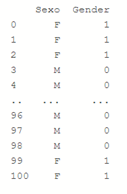<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1"><br></span>

### **Caso desejássemos apenas filtrar o dataset, sem associar nenhum valor a uma outra coluna, o comando poderia ser simplificado.**

\- Para salvar o resultado da filtragem no próprio dataset, ou seja, para modificar o dataset de modo que ele só armazene determinados valores:

In [ ]:
dataset = dataset[dataset['Sexo'] == 'F']
# substitua 'Sexo' pelo nome da coluna desejada, e 'F' pelo valor desejado.
# Os outros operadores lógicos podem ser usados nos filtros, em substituição ao igual ==
# >, >=, <, <=, != (different)

\- Para salvar os resultados da filtragem do dataset em um segundo dataframe df:

In [ ]:
df = dataset[dataset['Sexo'] == 'F']
# substitua 'Sexo' pelo nome da coluna desejada, e 'F' pelo valor desejado.
# Os outros operadores lógicos podem ser usados nos filtros, em substituição ao igual ==
# >, >=, <, <=, != (different)

## **Modificar nomes das colunas**

Caso seja de interesse modificar os nomes das colunas (e.g. quando elas estão expressas apenas como índices) utilize os seguintes comandos:

In [ ]:
#1. Crie uma lista com os nomes das novas colunas
column_names = ['coluna 1', 'coluna 2', 'coluna 3', 'coluna 4']

#2. Modifique os nomes das colunas do dataframe
dataset.columns = column_names

#3. Verifique se os nomes estão corretos
dataset.head()

## **Exportar dataframe obtido como um arquivo CSV**

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">Principalmente quando trabalhamos com bases extensas e as quais devem ser trabalhadas por diversas operações matemáticas, pode ser interessante exportar as bases já trabalhadas como arquivos CSV (que ocupam menor memória e podem ser lidos facilmente pelo Python, R, ou mesmo Matlab). Veja este exemplo no qual selecionamos colunas de interesse e exportamos o dataset:</span>

<span lang="EN-US" style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;background:yellow;
mso-highlight:yellow;mso-ansi-language:EN-US">dataset</span> <span lang="EN-US" style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;mso-ansi-language:
EN-US"> = <span style="background:yellow;mso-highlight:yellow">dataset</span> [[<span style="background:yellow;mso-highlight:yellow">'Contact ID'</span>, '<span style="background:yellow;mso-highlight:yellow">Day</span>', <span style="background:yellow;mso-highlight:yellow">'User type'</span>, <span style="background:yellow;mso-highlight:yellow">'Contact channel'</span>, <span style="background:yellow;mso-highlight:yellow">'Contact reason'</span>, <span style="background:yellow;mso-highlight:yellow">'Client business type'</span>, <span style="background:yellow;mso-highlight:yellow">'Call time (min)</span>', '<span style="background:yellow;mso-highlight:yellow">Reason</span>', <span style="background:yellow;mso-highlight:yellow">'Satisfaction grade'</span>, '<span style="background:yellow;mso-highlight:yellow">Satisfaction (bin)'</span>]]</span>

**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;
color:red">O comando para exportação do arquivo deve ser declarado na forma:</span>**

<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif;background:yellow;
mso-highlight:yellow">df</span><span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif">.to_csv(r<span style="background:yellow;mso-highlight:yellow">"endereço_do_arquivo\<span style="color:red">Nome_do_arquivo</span>.csv"</span>, index = <span style="background:yellow;mso-highlight:yellow">False</span>)<o:p></o:p></span>

In [ ]:
dataset.to_csv(r"D:\Drive\FM2S\EAD\Green Belt em Python\\Machine Learning - módulo 3 - ANN classification\ANN.Class - 1 - user sactisfaction\poll.csv", index = False)
#Modifique o endereço (path) pelo endereço em que o arquivo deve ser salvo
#Modifique o trecho "poll.csv" pelo nome desejado para o arquivo. Não remova a extensão .csv.
#Exemplo: se deseja que o arquivo se chame dataframe_tratado, substitua o trecho "poll.csv" por "dataframe_tratado.csv"

**<span style="font-size:12.0pt;font-family:&quot;Times New Roman&quot;,serif">Note que o arquivo CSV exportado desta forma não inclui os índices das linhas.</span>**

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif">- Caso desejássemos incluir os índices no novo arquivo CSV, bastaria mudar a opção index para <span style="background:
yellow;mso-highlight:yellow">True</span>.</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">Exemplo:</span>

<span style="font-size:12.0pt;
font-family:&quot;Times New Roman&quot;,serif;color:black;mso-themecolor:text1">dataset.to_csv(r'<span style="background:yellow;mso-highlight:yellow">D:\Drive\SumUP\Notas.csv'</span>, index = True)</span>

****